# Objective: Build processed dataset to classify countries as high waste and low waste

## Setup

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Import raw data

In [2]:
path_to_dataset = r'C:\\Users\\patil\\Documents\\GitHub\\trashmap\\data\\raw'
filename = 'country_level_data.csv'
full_file_path = os.path.join(path_to_dataset, filename)
df = pd.read_csv(full_file_path)

In [3]:
df

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,2057.062256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,AGO,SSF,Angola,LMC,8036.690430,51.800000,6.700000,4.400000,11.500000,11.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,ECS,Albania,UMC,13724.058590,51.400000,4.500000,4.800000,15.210000,9.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,AND,ECS,Andorra,HIC,43711.800780,31.200000,8.200000,2.600000,11.600000,35.100000,...,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,65.000000,1.000000,6.000000,6.000000,7.000000,...,12.0,NaN,NaN,25.0,NaN,8.0,NaN,47.0,8.0,Other
214,ZAF,SSF,South Africa,UMC,12666.607420,16.381655,5.200216,16.910461,45.020646,9.396918,...,72.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN
215,ZMB,SSF,Zambia,LMC,3201.289307,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,ZWE,SSF,Zimbabwe,LIC,3190.506592,36.000000,5.000000,6.000000,3.000000,27.000000,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,84.0,NaN,NaN


## Exploring target variable and deciding bounds for the classification problem

In [17]:
df = df.rename(columns = {'population_population_number_of_people': 'population', 
                          'total_msw_total_msw_generated_tons_year': 'total_msw',
                          'income_id': 'income',
                          'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations': 'national_agency',
                          'other_information_national_law_governing_solid_waste_management_in_the_country': 'national_law',
                          'other_information_ppp_rules_and_regulations':'ppp',
                          'other_information_summary_of_key_solid_waste_information_made_available_to_the_public': 'summary_available',
                          'other_information_information_system_for_solid_waste_management': 'information_system'
                         })
df['msw_per_cap'] = df['total_msw'] / df['population'] * 907.185 #converting to kg waste per person per year
df

,iso3c,region_id,country_name,income,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,msw_per_cap,high_waste
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN,774.826708,True
1,AFG,SAS,Afghanistan,LIC,2057.062256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,147.336942,False
2,AGO,SSF,Angola,LMC,8036.690430,51.800000,6.700000,4.400000,11.500000,11.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.316361,False
3,ALB,ECS,Albania,UMC,13724.058590,51.400000,4.500000,4.800000,15.210000,9.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites,345.637478,False
4,AND,ECS,Andorra,HIC,43711.800780,31.200000,8.200000,2.600000,11.600000,35.100000,...,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN,473.231612,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,65.000000,1.000000,6.000000,6.000000,7.000000,...,NaN,25.0,NaN,8.0,NaN,47.0,8.0,Other,159.072536,False
214,ZAF,SSF,South Africa,UMC,12666.607420,16.381655,5.200216,16.910461,45.020646,9.396918,...,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,323.687152,False
215,ZMB,SSF,Zambia,LMC,3201.289307,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.876066,False
216,ZWE,SSF,Zimbabwe,LIC,3190.506592,36.000000,5.000000,6.000000,3.000000,27.000000,...,NaN,NaN,NaN,16.0,NaN,84.0,NaN,NaN,105.211043,False


In [5]:
df['msw_per_cap'].describe()

count     215.000000
mean      342.501983
std       236.465487
min        33.901601
25%       153.852945
50%       289.732209
75%       459.143647
max      1256.358263
Name: msw_per_cap, dtype: float64

In [6]:
path_to_dataset = r'C:\\Users\\patil\\Documents\\GitHub\\trashmap\\data\\processed'
filename = '01b_msw_per_cap_kdeplot.jpeg'
full_file_path = os.path.join(path_to_dataset, filename)

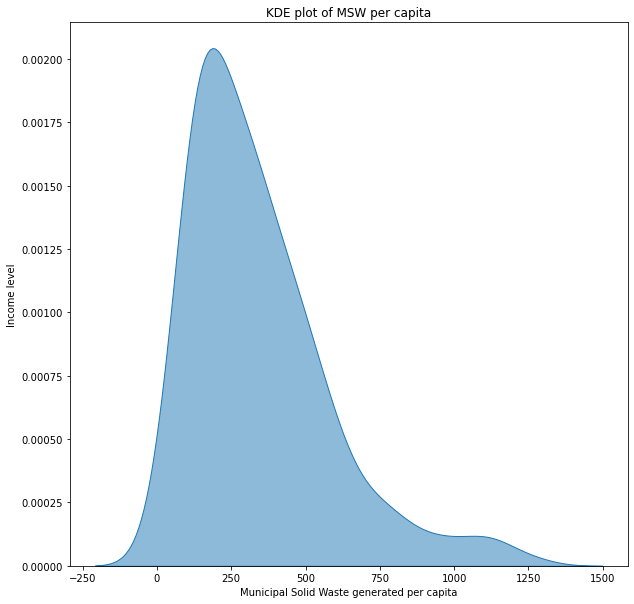

In [7]:
plt.figure(figsize = (10,10))
sns.kdeplot(data=df, x = 'msw_per_cap', fill= True, alpha = 0.5)
plt.title(f'KDE plot of MSW per capita')
plt.xlabel('Municipal Solid Waste generated per capita')
plt.ylabel('Income level')
plt.savefig(full_file_path)

In [8]:
df['high_waste'] = df['msw_per_cap'] >= 365
df['high_waste'].value_counts()

False    140
True      78
Name: high_waste, dtype: int64

Setting the threshold at 1kg waste per person per day (365 kg msw per year per cap)

### Checking the dist of income level in the 2 groups

In [9]:
pivot = df.pivot_table(columns = 'income', values = 'msw_per_cap', index = 'high_waste', aggfunc = ['count', 'mean'])
pivot

count                          mean                          \
income       HIC   LIC   LMC   UMC         HIC         LIC         LMC   
high_waste                                                               
False       13.0  33.0  45.0  46.0  311.089841  147.812344  163.233069   
True        66.0   NaN   2.0  10.0  606.189924         NaN  942.604617   

                        
income             UMC  
high_waste              
False       247.472971  
True        409.296220

## Filtering out the input columns

In [18]:
df['national_agency'] = df['national_agency'].replace('None', 'No')
df['national_agency'].value_counts(dropna = False)

Yes    148
NaN     54
No      16
Name: national_agency, dtype: int64

In [19]:
df['national_law'] = df['national_law'].replace('yes', 'Yes')
df['national_law'].value_counts(dropna = False)

Yes    177
NaN     24
No      17
Name: national_law, dtype: int64

In [20]:
df['ppp'] = df['ppp'].replace('None', 'No')
df['ppp'].value_counts(dropna = False)

Yes    116
NaN     56
No      46
Name: ppp, dtype: int64

In [22]:
df['summary_available'] = df['summary_available'].replace('None', 'No')
df['summary_available'] = df['summary_available'].replace('yes', 'Yes')
df['summary_available'] = df['summary_available'].replace('MNRE publishes monthly environmental newsletters informing the public about solid waste activities and projects.', 'Yes')
df['summary_available'].value_counts(dropna = False)

NaN    145
Yes     61
No      12
Name: summary_available, dtype: int64

In [23]:
df['information_system'] = df['information_system'].replace('None', 'No')
df['information_system'].value_counts(dropna = False)

NaN    106
Yes     64
No      48
Name: information_system, dtype: int64

In [25]:
cols = ['gdp', 'national_agency', 'national_law', 'ppp', 'summary_available', 'information_system', 'income', 'population', 'high_waste', 'msw_per_cap']
df[cols]

,gdp,national_agency,national_law,ppp,summary_available,information_system,income,population,high_waste,msw_per_cap
0,35563.312500,Yes,Yes,Yes,Yes,NaN,HIC,103187.0,True,774.826708
1,2057.062256,Yes,Yes,Yes,NaN,NaN,LIC,34656032.0,False,147.336942
2,8036.690430,NaN,Yes,Yes,NaN,NaN,LMC,25096150.0,False,152.316361
3,13724.058590,Yes,Yes,Yes,No,No,UMC,2854191.0,False,345.637478
4,43711.800780,Yes,Yes,Yes,NaN,NaN,HIC,82431.0,True,473.231612
...,...,...,...,...,...,...,...,...,...,...
213,8269.671875,Yes,Yes,No,NaN,No,LIC,27584212.0,False,159.072536
214,12666.607420,Yes,Yes,NaN,NaN,Yes,UMC,51729344.0,False,323.687152
215,3201.289307,NaN,Yes,NaN,NaN,NaN,LMC,14264756.0,False,165.876066
216,3190.506592,NaN,Yes,NaN,NaN,NaN,LIC,12500525.0,False,105.211043


In [16]:
df

,iso3c,region_id,country_name,income,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,msw_per_cap,high_waste
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN,774.826708,True
1,AFG,SAS,Afghanistan,LIC,2057.062256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,147.336942,False
2,AGO,SSF,Angola,LMC,8036.690430,51.800000,6.700000,4.400000,11.500000,11.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.316361,False
3,ALB,ECS,Albania,UMC,13724.058590,51.400000,4.500000,4.800000,15.210000,9.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites,345.637478,False
4,AND,ECS,Andorra,HIC,43711.800780,31.200000,8.200000,2.600000,11.600000,35.100000,...,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN,473.231612,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,65.000000,1.000000,6.000000,6.000000,7.000000,...,NaN,25.0,NaN,8.0,NaN,47.0,8.0,Other,159.072536,False
214,ZAF,SSF,South Africa,UMC,12666.607420,16.381655,5.200216,16.910461,45.020646,9.396918,...,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,323.687152,False
215,ZMB,SSF,Zambia,LMC,3201.289307,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.876066,False
216,ZWE,SSF,Zimbabwe,LIC,3190.506592,36.000000,5.000000,6.000000,3.000000,27.000000,...,NaN,NaN,NaN,16.0,NaN,84.0,NaN,NaN,105.211043,False
